In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import wbgapi as wb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RNN, Dropout, SimpleRNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

2022-12-12 12:30:50.447640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 12:30:50.659386: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kaygun/local/lib
2022-12-12 12:30:50.659413: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 12:30:51.570560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared obj

In [2]:
def load_data(ID,ec,T):
    data = wb.data.DataFrame(ID,economy=ec).T
    data.dropna(inplace=True)
    N = data.shape[0]
    raw = data[ec].to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [17]:
X_train,X_test,Y_train,Y_test = load_data('SP.RUR.TOTL.ZS','ITA',8)

In [18]:
X_train.shape

(53, 1)

In [19]:
model = Sequential()
model.add(SimpleRNN(128, input_shape = (1,1), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)
callbacks_list = [early]
    
model.compile(loss = 'mape', optimizer = 'adam', metrics = ['mse'])

In [20]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
11/11 [==============================] - 2s 40ms/step - loss: 85.4795 - mse: 871.9976 - val_loss: 76.4175 - val_mse: 515.4075
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 67.5960 - mse: 550.2261 - val_loss: 62.3985 - val_mse: 343.6544
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 56.4531 - mse: 400.4173 - val_loss: 48.2718 - val_mse: 205.6726
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 43.1062 - mse: 249.5725 - val_loss: 33.7500 - val_mse: 100.5463
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 24.5200 - mse: 94.2296 - val_loss: 19.4665 - val_mse: 33.4554
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 18.5824 - mse: 59.3018 - val_loss: 10.6497 - val_mse: 10.0164
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 17.5071 - mse: 57.0146 - val_loss: 5.1016 - val_mse: 2.3007
Epoch 8/10
11/11 [==============================] - 0s 

In [21]:
Y_pred = model.predict(X_test).reshape(X_test.shape[0])
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

1/1 [==============================] - 1s 529ms/step


,X_test,Y_test,Y_pred
0,31.021,30.728,30.504171
1,30.728,30.435,30.221138
2,30.435,30.145,29.938107
3,30.145,29.856,29.657972
4,29.856,29.562,29.378799
5,29.562,29.264,29.094801
6,29.264,28.961,28.806938
7,28.961,28.654,28.514248


<AxesSubplot: >

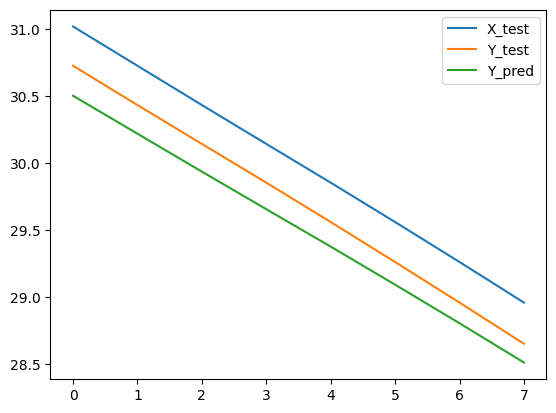

In [22]:
res.plot()